# Stroke Prediction Analysis

## Importing Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (7,7)

In [2]:
data = pd.read_csv("E:\Summer Training Python\Project\healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Cleaning

## Fill null values

In [3]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [5]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [6]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Drop id column because it has no use for prediction

In [7]:
data.drop('id', axis=1, inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Explorarotary Data Analysis

In [8]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
data.shape

(5110, 11)

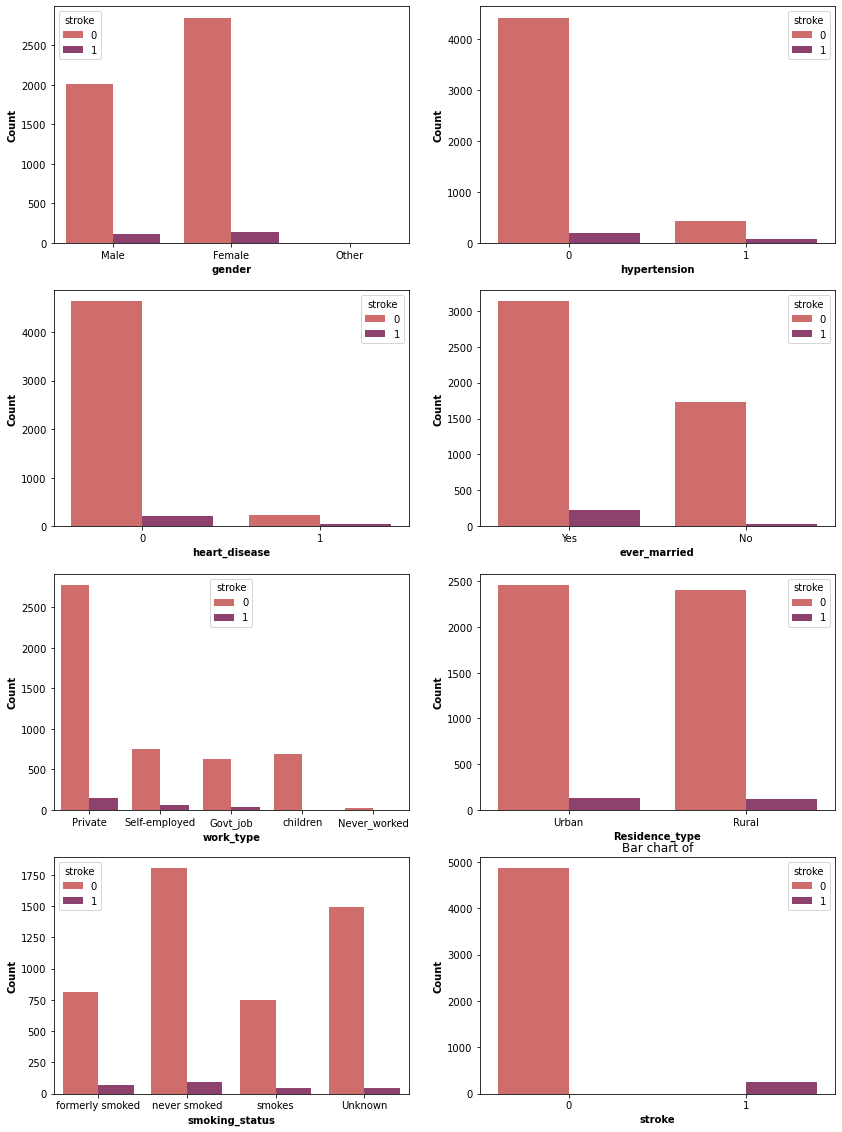

In [10]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=data, ax=axs[i], hue =data['stroke'], palette = 'flare')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

## Label Encoding

In [11]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [12]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [13]:
gender = enc.fit_transform(data['gender'])
smoking_status = enc.fit_transform(data['smoking_status'])
ever_married = enc.fit_transform(data['ever_married'])
work_type = enc.fit_transform(data['work_type'])
residence_type = enc.fit_transform(data['Residence_type'])

In [14]:
work_type

array([2, 3, 2, ..., 3, 2, 0])

In [15]:
data['gender'] = gender
data['smoking_status'] = smoking_status
data['ever_married'] = ever_married
data['work_type'] = work_type
data['Residence_type'] = residence_type

In [16]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## Splitting the data 

In [17]:
X = data.drop('stroke', axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [18]:
Y = data['stroke']
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

## Normalization

In [45]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [21]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [22]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [46]:
X_train_std

array([[-0.8361144 , -0.32824306, -0.33206349, ..., -0.86023092,
         0.99513416, -0.35492266],
       [-0.8361144 , -0.41649391, -0.33206349, ..., -0.50170259,
         2.50152031, -0.35492266],
       [ 1.193598  ,  0.73076708, -0.33206349, ..., -0.90725464,
         0.24194108,  0.57814732],
       ...,
       [ 1.193598  ,  0.02476032, -0.33206349, ..., -0.25488321,
        -0.06444255,  1.5112173 ],
       [ 1.193598  , -0.9901244 , -0.33206349, ...,  0.32419302,
         0.10151525, -0.35492266],
       [-0.8361144 ,  0.64251624,  3.01147232, ..., -1.03176818,
         0.5483247 ,  0.57814732]])

## Save the scaler object

In [24]:
import pickle
import os

In [25]:
scaler_path=os.path.join('E:/Summer Training Python/Project/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

# Modeling

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [27]:
y_pred = dt.predict(X_test_std)
df1 = pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

In [28]:
df1

,Actual,Predicted
42,1,0
380,0,0
3524,0,0
352,0,0
4927,0,0
...,...,...
472,0,0
4446,0,0
660,0,0
57,1,0


In [29]:
from sklearn.metrics import accuracy_score
ac_de = accuracy_score(Y_test,y_pred)
print("Accuracy: ",ac_de)

Accuracy:  0.9217221135029354


In [30]:
import joblib
model_path=os.path.join('E:\Summer Training Python\Project\dt.sav')
joblib.dump(dt,model_path)

['E:\\Summer Training Python\\Project\\dt.sav']

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [32]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [33]:
Y_pred_lr = lr.predict(X_test_std)

In [34]:
ac_lr = accuracy_score(Y_test,Y_pred_lr)
print("Accuracy: ",ac_lr)

Accuracy:  0.9471624266144814


## Knn

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train_std, Y_train)

KNeighborsClassifier()

In [37]:
y_pred_Kn = knn.predict(X_test_std)
ac_kn = accuracy_score(Y_test,y_pred_Kn)
print("Accuracy: ",ac_kn)

Accuracy:  0.9471624266144814


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [39]:
rf.fit(X_train_std, Y_train)

RandomForestClassifier()

In [40]:
Y_pred_rf = rf.predict(X_test)
ac_rf = accuracy_score(Y_test,Y_pred_rf)
print("Accuracy: ",ac_rf)

Accuracy:  0.9471624266144814


## SVM

In [41]:
from sklearn.svm import SVC
sv = SVC()

In [42]:
sv.fit(X_train_std,Y_train)

SVC()

In [43]:
Y_pred_svm = sv.predict(X_test_std)
ac_svm = accuracy_score(Y_test,Y_pred_svm)
print("Accuracy: ",ac_svm )

Accuracy:  0.9471624266144814


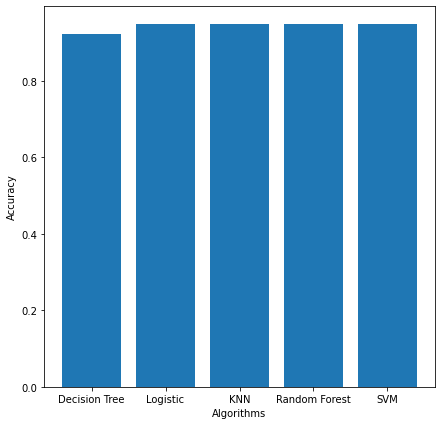

In [44]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_de,ac_lr,ac_kn,ac_rf,ac_svm])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()